# Real world images

Now we will use real world, to build a convolutional neural network. 

# Image Data Generator

One feature of the image generator is that you can point it at a directory and 
then the sub-derectories of that will automatically generate labels for you. 

Images --- Training -- horses
        |           |_ Humans
        |
        | Validation

If you point for training, horses and humans will be the labes.

Ref: https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W4/ungraded_labs/C1_W4_Lab_1_image_generator_no_validation.ipynb

# Validation Data

Validation set is data that the neural network has not previously seen. 

https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W4/ungraded_labs/C1_W4_Lab_2_image_generator_with_validation.ipynb

# Compressing images

* Training is fast
* Accuracy very high -> Overfitting 
* Exclude some convolutions 
* Much cheaper to train. But errors can happens. 

https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W4/ungraded_labs/C1_W4_Lab_3_compacted_images.ipynb

In [ ]:
#Loadfile

!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-06-24 23:38:23--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   232MB/s    in 0.6s    

2022-06-24 23:38:23 (232 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



['horse02-0.png', 'horse33-9.png', 'horse23-6.png', 'horse50-0.png', 'horse39-0.png', 'horse30-9.png', 'horse14-2.png', 'horse20-0.png', 'horse29-2.png', 'horse14-6.png']
['human01-07.png', 'human08-05.png', 'human07-20.png', 'human16-11.png', 'human17-12.png', 'human17-07.png', 'human04-13.png', 'human01-01.png', 'human14-13.png', 'human15-02.png']
Total of horse images:  500
Total of human images:  527


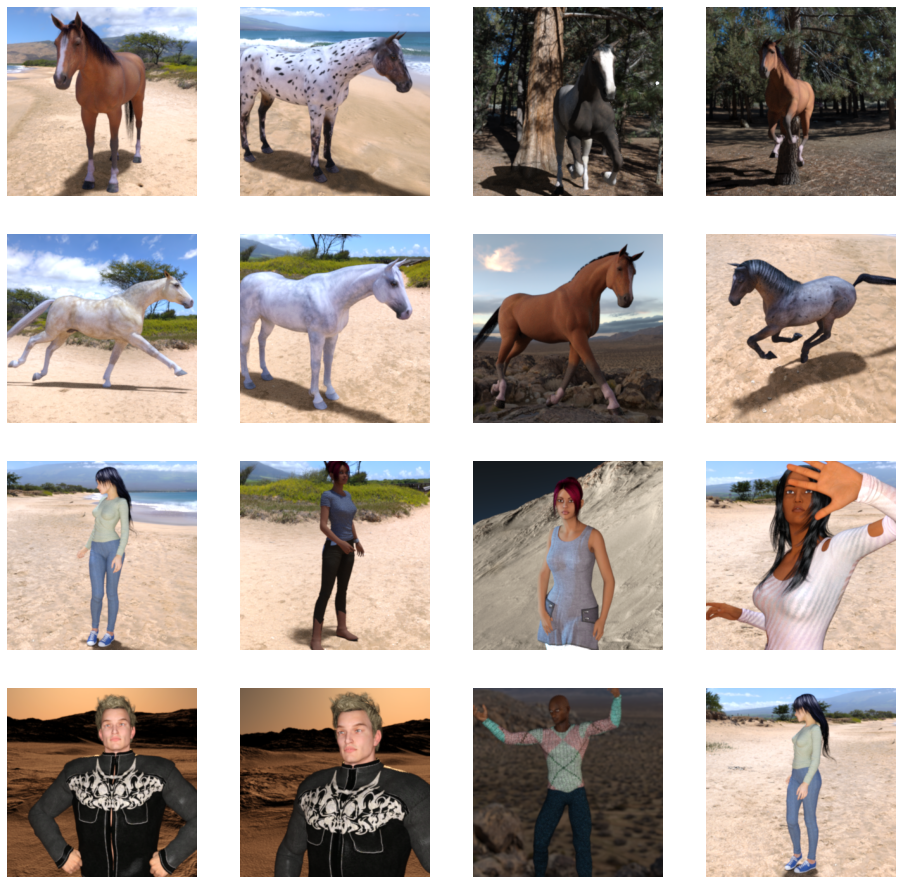

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 35, 35, 64)      

In [ ]:
#Files
import zipfile
#Path
import os
#Show images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#Building Model
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


if __name__ == "__main__":

  #Load File
  local_zip='./horse-or-human.zip'
  zip_ref=zipfile.ZipFile(local_zip, 'r')
  zip_ref.extractall('./horse-or-human')
  zip_ref.close()

  #Creating the training directory 
  #Horse
  train_horse_dir = os.path.join('./horse-or-human/horses')
  #Human
  train_human_dir = os.path.join('./horse-or-human/humans')

  #Listing a few directories 
  train_horse_names = os.listdir(train_horse_dir)
  print(train_horse_names[:10])
  train_human_names = os.listdir(train_human_dir)
  print(train_human_names[:10])

  #Total of images
  print('Total of horse images: ', len(os.listdir(train_horse_dir)))
  print('Total of human images: ', len(os.listdir(train_human_dir)))

  #Display pictures
  #4x4 configuration (output images)
  nrows = 4
  ncols = 4
  #Index to iterate over the images
  pic_index = 0 

  fig = plt.gcf()
  fig.set_size_inches(ncols * 4, nrows * 4)

  pic_index += 8

  next_horse_pic = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
  next_human_pic = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

  for i, img_path in enumerate(next_horse_pic + next_human_pic):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off') #Dont show axes

    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.show()

  model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.summary()
  model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

  train_datagen = ImageDataGenerator(rescale=1/255)
  train_generator = train_datagen.flow_from_directory(
      './horse-or-human',
      target_size=(300,300),
      batch_size=128,
      class_mode='binary'
  )

  history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

In [6]:
#Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
#Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

#Import files
import zipfile
#Directory to training and validation set
import os
#Build model
import tensorflow as tf
#Model Compile
from tensorflow.keras.optimizers import RMSprop
#Data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

if __name__ == "__main__":

  #Training set
  local_zip = './horse-or-human.zip'
  zip_ref = zipfile.ZipFile(local_zip, 'r')
  zip_ref.extractall('./horse-or-human')
  # Unzip validation set
  local_zip = './validation-horse-or-human.zip'
  zip_ref = zipfile.ZipFile(local_zip, 'r')
  zip_ref.extractall('./validation-horse-or-human')

  zip_ref.close()

  #Train directory 
  train_horse_dir = os.path.join('./horse-or-human/horses')
  train_human_dir = os.path.join('./horse-or-human/humans')
  #Validation directory
  validation_horse_dir = os.path.join('./validation-horse-or-human/horses')
  validation_human_dir = os.path.join('./validation-horse-or-human/humans')

  #Build model
  model =tf.keras.Sequential([
    #First convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    #Second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #Hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])


  #Model compile
  model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])
  
  #Data preprocessing
  
  #rescale images
  train_datagen = ImageDataGenerator(rescale = 1./255)
  validation_datagen = ImageDataGenerator(rescale = 1./255)

  # Flow training images in batches of 128 using train_datagen generator
  train_generator = train_datagen.flow_from_directory(
          './horse-or-human/',  # This is the source directory for training images
          target_size=(300, 300),  # All images will be resized to 300x300
          batch_size=128,
          # Since you use binary_crossentropy loss, you need binary labels
          class_mode='binary')

  # Flow validation images in batches of 128 using validation_datagen generator
  validation_generator = validation_datagen.flow_from_directory(
          './validation-horse-or-human/',  # This is the source directory for validation images
          target_size=(300, 300),  # All images will be resized to 300x300
          batch_size=32,
          # Since you use binary_crossentropy loss, you need binary labels
          class_mode='binary')
  
  #Training
  history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)


--2022-06-25 15:14:41--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.128, 173.194.192.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.5’

horse-or-human.zip. 100%[===================>] 142.65M   217MB/s    in 0.7s    

2022-06-25 15:14:42 (217 MB/s) - ‘horse-or-human.zip.5’ saved [149574867/149574867]

--2022-06-25 15:14:42--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114